In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.metrics.cluster import v_measure_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
#carregar a base
Base = pd.read_csv('res/breast-cancer.csv')
Base

,class,idade,menopausa,tamanho tumor,inv-nodulo,nodulo-caps,maligno,peito,mamario-quadrimes,irradiado
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
#vendo os tipos dos atributos
Base.dtypes

class                object
idade                object
menopausa            object
tamanho tumor        object
inv-nodulo           object
nodulo-caps          object
maligno               int64
peito                object
mamario-quadrimes    object
irradiado            object
dtype: object

In [ ]:
#adicionando os tipos na descrição da base 
Base.describe(include=['float64', 'int64','object', 'bool'])
#coloquei para garantir o replace dos valores vazios, pois eles não tem nenhum caracter apenas em branco mesmo
Base = Base.replace("?", np.NaN)
#coloquei para garantir que os valores vazios tenham algum valor 
#Subistituindo valores categoricos 
for col in Base.columns:
    if Base[col].dtypes == 'object':
        Base[col] = Base[col].fillna(Base[col].value_counts().index[0])
#mostrando o tipo novamente          
Base.dtypes

class                object
idade                object
menopausa            object
tamanho tumor        object
inv-nodulo           object
nodulo-caps          object
maligno               int64
peito                object
mamario-quadrimes    object
irradiado            object
dtype: object

In [ ]:
#subistituir com Label encoder, subistituindo dados categoricos em númericos
atributos = ["class","idade","menopausa","tamanho tumor","inv-nodulo","nodulo-caps","peito","mamario-quadrimes","irradiado"]
enc = OrdinalEncoder()
enc.fit(Base[atributos])
Base[atributos] = enc.transform(Base[atributos])
Base.describe(include=['float64', 'int64','object', 'bool'])
Base

,class,idade,menopausa,tamanho tumor,inv-nodulo,nodulo-caps,maligno,peito,mamario-quadrimes,irradiado
0,0.0,1.0,2.0,5.0,0.0,1.0,3,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,2,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,2,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,2,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,2,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
281,1.0,1.0,2.0,5.0,0.0,1.0,2,0.0,3.0,0.0
282,1.0,1.0,2.0,3.0,0.0,1.0,3,0.0,3.0,1.0
283,1.0,4.0,0.0,3.0,0.0,1.0,1,1.0,3.0,0.0
284,1.0,2.0,0.0,5.0,4.0,1.0,3,0.0,2.0,0.0


In [ ]:
Base.dtypes

class                float64
idade                float64
menopausa            float64
tamanho tumor        float64
inv-nodulo           float64
nodulo-caps          float64
maligno                int64
peito                float64
mamario-quadrimes    float64
irradiado            float64
dtype: object

In [ ]:
#usando One Hot Enconder
Base = pd.get_dummies(Base, columns=["idade","menopausa","tamanho tumor","inv-nodulo","nodulo-caps","maligno","peito","mamario-quadrimes","irradiado"])
Base

,class,idade_0.0,idade_1.0,idade_2.0,idade_3.0,idade_4.0,idade_5.0,menopausa_0.0,menopausa_1.0,menopausa_2.0,...,peito_0.0,peito_1.0,mamario-quadrimes_0.0,mamario-quadrimes_1.0,mamario-quadrimes_2.0,mamario-quadrimes_3.0,mamario-quadrimes_4.0,mamario-quadrimes_5.0,irradiado_0.0,irradiado_1.0
0,0.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,0.0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,0.0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
282,1.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
283,1.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
284,1.0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
#Criar meu Y class e X bases
y = Base.iloc[:,0]
X = Base.iloc[:,1:]

X

,idade_0.0,idade_1.0,idade_2.0,idade_3.0,idade_4.0,idade_5.0,menopausa_0.0,menopausa_1.0,menopausa_2.0,tamanho tumor_0.0,...,peito_0.0,peito_1.0,mamario-quadrimes_0.0,mamario-quadrimes_1.0,mamario-quadrimes_2.0,mamario-quadrimes_3.0,mamario-quadrimes_4.0,mamario-quadrimes_5.0,irradiado_0.0,irradiado_1.0
0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
282,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
283,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
284,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
281    1.0
282    1.0
283    1.0
284    1.0
285    1.0
Name: class, Length: 286, dtype: float64

In [ ]:
#Padronizando
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,0.938924,-0.938924,-0.059235,-0.281505,1.264911,-0.716399,-0.302660,-0.361158,0.558504,-0.558504
1,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,-1.065049,1.065049,-0.059235,-0.281505,-0.790569,-0.716399,-0.302660,2.768875,0.558504,-0.558504
2,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,0.938924,-0.938924,-0.059235,-0.281505,1.264911,-0.716399,-0.302660,-0.361158,0.558504,-0.558504
3,-0.059235,-0.379473,-0.677631,-0.710819,2.004381,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,-1.065049,1.065049,-0.059235,-0.281505,-0.790569,1.395870,-0.302660,-0.361158,0.558504,-0.558504
4,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,5.894913,...,-1.065049,1.065049,-0.059235,-0.281505,-0.790569,-0.716399,3.304038,-0.361158,0.558504,-0.558504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,0.938924,-0.938924,-0.059235,-0.281505,-0.790569,1.395870,-0.302660,-0.361158,0.558504,-0.558504
282,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,0.938924,-0.938924,-0.059235,-0.281505,-0.790569,1.395870,-0.302660,-0.361158,-1.790498,1.790498
283,-0.059235,-0.379473,-0.677631,-0.710819,2.004381,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,-1.065049,1.065049,-0.059235,-0.281505,-0.790569,1.395870,-0.302660,-0.361158,0.558504,-0.558504
284,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,0.938924,-0.938924,-0.059235,-0.281505,1.264911,-0.716399,-0.302660,-0.361158,0.558504,-0.558504


In [ ]:
#Calculando distancia entre cada elemento
pd.DataFrame(pairwise_distances(X, metric='euclidean'))

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
0,0.000000,7.587112,5.959056,8.100945,9.519577,6.993341,5.912276,6.820061,8.084384,7.226953,...,8.722672,9.784447,11.128298,9.382282,9.382282,4.184209,5.717195,7.951838,6.010216,5.997513
1,7.587112,0.000000,4.696160,7.126914,8.155735,7.654282,6.681035,7.099111,8.109535,3.776080,...,10.636492,10.705534,10.346703,10.740125,10.740125,6.998573,7.474794,6.527040,8.138560,8.680872
2,5.959056,4.696160,0.000000,7.297439,8.305163,6.044346,4.752085,5.323858,6.611402,4.088826,...,9.976525,10.050102,11.362578,9.659004,9.659004,5.947782,6.501433,6.712821,6.646972,7.300933
3,8.100945,7.126914,7.297439,0.000000,9.157018,4.088826,7.259289,6.610039,9.115894,6.044346,...,11.008906,9.225866,11.606442,10.359280,10.359280,6.936693,8.299034,5.193662,8.214285,8.204996
4,9.519577,8.155735,8.305163,9.157018,0.000000,9.573198,8.814437,9.865049,9.940958,7.821802,...,10.962505,12.151812,12.637505,12.182297,12.182297,9.057489,10.138755,9.461715,9.964649,10.412282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,4.184209,6.998573,5.947782,6.936693,9.057489,6.983736,5.900912,7.378729,8.076077,5.892473,...,9.227276,9.791304,11.528080,10.273014,10.273014,0.000000,5.728923,7.334220,7.323272,7.312850
282,5.717195,7.474794,6.501433,8.299034,10.138755,8.338395,7.454999,7.298733,9.272501,6.450873,...,8.135465,8.769995,11.662377,9.304729,9.304729,5.728923,0.000000,7.253733,8.295120,8.285921
283,7.951838,6.527040,6.712821,5.193662,9.461715,6.610039,7.640049,4.088826,9.421921,5.323858,...,10.899653,9.095220,11.502866,10.243100,10.243100,7.334220,7.253733,0.000000,8.067273,8.057814
284,6.010216,8.138560,6.646972,8.214285,9.964649,7.124324,7.273295,6.954308,8.604019,7.803892,...,10.083980,9.330783,11.457040,8.908161,8.908161,7.323272,8.295120,8.067273,0.000000,3.020164


Projecting 43-dimensional data to 2D


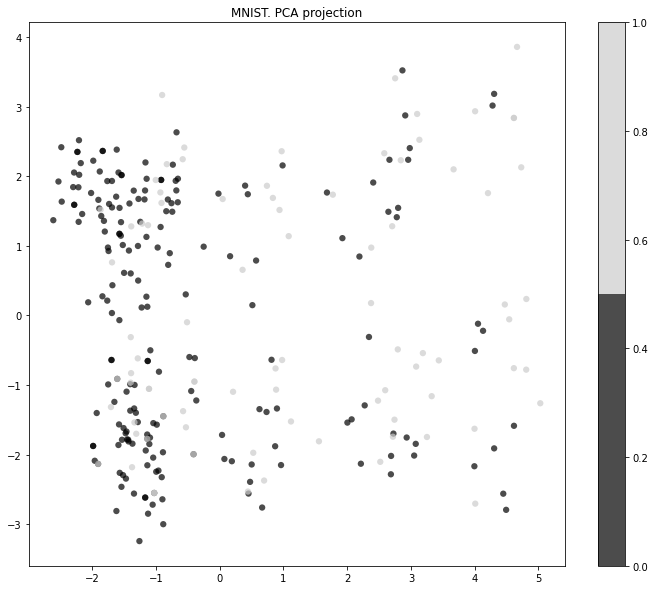

In [ ]:
#usando PCA para reduzir a dimensionalidade 

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('MNIST. PCA projection');

In [ ]:
#Gerando clusters Sem PCA
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
pd.DataFrame(labels)

,0
0,0
1,0
2,0
3,0
4,0
...,...
281,0
282,0
283,0
284,1


In [ ]:
#Calculando metricas Sem PCA
metrics.silhouette_score(X, labels, metric='euclidean')

0.15228283634719578

In [ ]:
 metrics.adjusted_rand_score(y, labels)

0.16650495862858627

In [ ]:
metrics.adjusted_mutual_info_score(y, labels)

0.07653596993440366

In [ ]:
v_measure_score(y, labels)

0.07929785948333061

Projecting 43-dimensional data to 2D


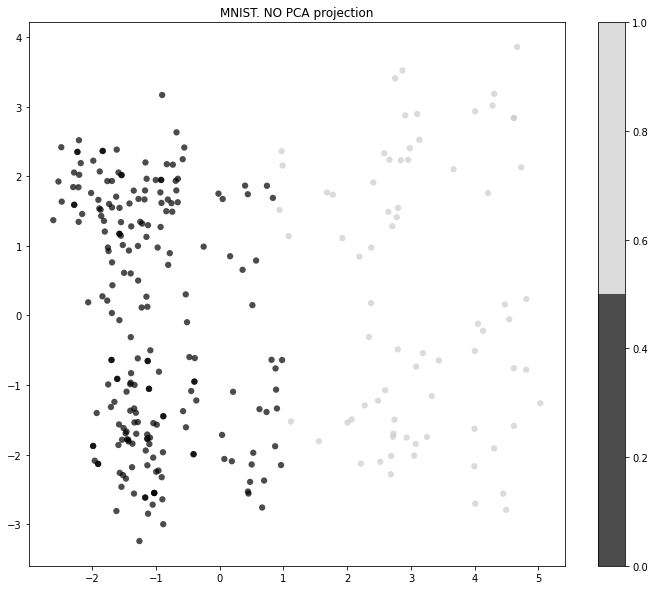

In [ ]:

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',2))
plt.colorbar()
plt.title('MNIST. NO PCA projection');

In [ ]:
#Gerando clusters com xreduced com PCA
kmeans = KMeans(n_clusters=2).fit(X_reduced)
labels = kmeans.labels_
pd.DataFrame(labels)

,0
0,0
1,0
2,0
3,0
4,0
...,...
281,0
282,0
283,0
284,1


In [ ]:
#Calculando Metricas com PCA
metrics.silhouette_score(X, labels, metric='euclidean')

0.15408236811769624

In [ ]:
 metrics.adjusted_rand_score(y, labels)

0.1590692821817304

In [ ]:
metrics.adjusted_mutual_info_score(y, labels)

0.07129156718785715

In [ ]:
v_measure_score(y, labels)

0.07407820786513271

Projecting 43-dimensional data to 2D


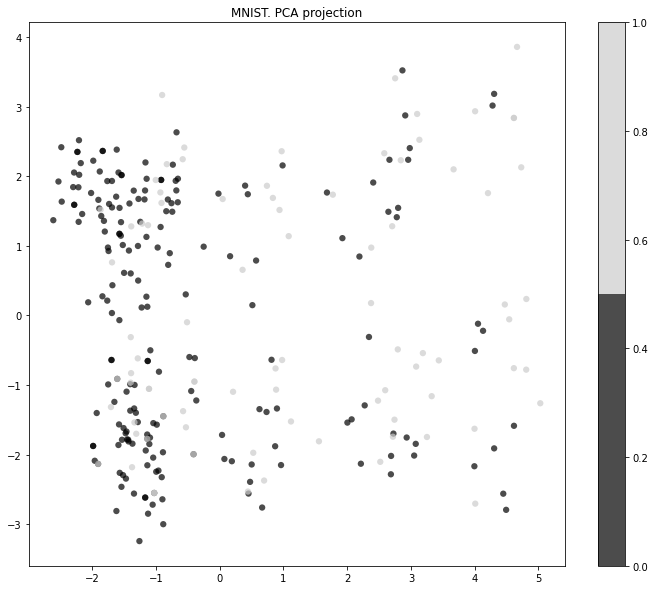

In [ ]:

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('MNIST. PCA projection');


#  Utilização do K-NN

In [1]:
#carregar a base
Base2 = pd.read_csv('res/breast-cancer.csv')
Base2.dtypes

NameError: ignored

In [ ]:
#subistituir com Label encoder, subistituindo dados categoricos em númericos
atributos = ["idade","menopausa","tamanho tumor","inv-nodulo","nodulo-caps","peito","mamario-quadrimes","irradiado"]
enc = OrdinalEncoder()
enc.fit(Base2[atributos])
Base2[atributos] = enc.transform(Base2[atributos])
Base2.describe(include=['float64', 'int64','object', 'bool'])
Base2

In [ ]:
#REMOVIR O ULTIMO VALOR PARA TREINAR SEM ELE
y = Base2.iloc[:,0]
X = Base2.iloc[:,1:]
X_teste = X.iloc[285]
X = X.drop(285)
y_teste = y.iloc[285]
y = y.drop(285)
X_teste


In [ ]:
#,treinar pegando um valor de 3 vizinhos e predizer um valor e qual classe o predizido pertence 


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)
knn.predict(np.array(X_teste).reshape(1,-1))



In [ ]:
#pegar os vizinhos e a distancia dos mais prossimos e confirmar se acertou 
dist, vizinhos = knn.kneighbors(np.array(X_teste).reshape(1,-1))
classes = []
for v in vizinhos:
    classes.append(Base2.iloc[:,0][v])
classes


In [ ]:
#PCA #não conseguir usar aqui

#Base2 = pd.read_csv('res/breast-cancer.csv')

#y = Base2.iloc[:,0]
#X = Base2.iloc[:,1:]


#X_pca = pd.DataFrame(pca.fit_transform(X.values))

#X_teste = X_pca.iloc[285]
#X_pca = X_pca.drop(285)
#y_teste = y.iloc[285]
#y = y.drop(285)


# Utilizando NAIVE BAYES

In [ ]:
#naive bayes e um classificador probabilistico
#carregar a base
Base2 = pd.read_csv('res/breast-cancer.csv')
Base2.dtypes

class                object
idade                object
menopausa            object
tamanho tumor        object
inv-nodulo           object
nodulo-caps          object
maligno               int64
peito                object
mamario-quadrimes    object
irradiado            object
dtype: object

In [ ]:
#subistituir com Label encoder, dados categoricos em númericos CASO A BASE NÃO SEJA NÚMERICA)
atributos = ["class","idade","menopausa","tamanho tumor","inv-nodulo","nodulo-caps","peito","mamario-quadrimes","irradiado"]
enc = OrdinalEncoder()
enc.fit(Base2[atributos])
Base2[atributos] = enc.transform(Base2[atributos])
Base2.describe(include=['float64', 'int64','object', 'bool'])
Base2

,class,idade,menopausa,tamanho tumor,inv-nodulo,nodulo-caps,maligno,peito,mamario-quadrimes,irradiado
0,0.0,1.0,2.0,5.0,0.0,1.0,3,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,2,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,2,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,2,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,2,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
281,1.0,1.0,2.0,5.0,0.0,1.0,2,0.0,3.0,0.0
282,1.0,1.0,2.0,3.0,0.0,1.0,3,0.0,3.0,1.0
283,1.0,4.0,0.0,3.0,0.0,1.0,1,1.0,3.0,0.0
284,1.0,2.0,0.0,5.0,4.0,1.0,3,0.0,2.0,0.0


In [ ]:
#REMOVIR O ULTIMO VALOR PARA TREINAR SEM ELE SEPARANDO MEU X E MEU Y
y = Base2.iloc[:,0]
X = Base2.iloc[:,1:]

X_teste = X.iloc[285]
X = X.drop(285)
y_teste = y.iloc[285]
y = y.drop(285)
y_teste

1.0

In [ ]:
#predizer o valor de teste  com GaussianNB acertando com o calor de y teste
gnb = GaussianNB()
gnb.fit(X, y)
gnb.predict(np.array(X_teste).reshape(1,-1))

array([1.])

# Usando SVM

In [ ]:
#svm responsavel por achar o "hiperplano otimo"
#usando classificador svc com kernell rbf default obs: se 1 ele acertou pq o elemento e class1
svc = SVC(kernel='rbf')
svc.fit(X, y)
svc.predict(np.array(X_teste).reshape(1,-1))

array([1.])

In [ ]:
#usando classificador svc com kernell linear 0bs errou pois disse q era 0
svc = SVC(kernel='linear')
svc.fit(X, y)
svc.predict(np.array(X_teste).reshape(1,-1))


array([0.])

In [ ]:
#usando classificador svc com kernell polinomial acertou
svc = SVC(kernel='poly')
svc.fit(X, y)
svc.predict(np.array(X_teste).reshape(1,-1))

array([1.])

In [ ]:
#usando classificador svc com kernell sigmoidal errou
svc = SVC(kernel='sigmoid')
svc.fit(X, y)
svc.predict(np.array(X_teste).reshape(1,-1))

array([0.])

# usando arvore de decisão

In [ ]:
#cauculo o ganho de informação com o criterio de entropia
arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(X, y)
arvore.predict(np.array(X_teste).reshape(1,-1))


array([1.])

In [ ]:
#exibir as regras que foram geradas passando os atributos da base
tree_rules = export_text(arvore, feature_names=list(X.columns))
print(tree_rules)

|--- maligno <= 2.50
|   |--- tamanho tumor <= 1.50
|   |   |--- idade <= 1.50
|   |   |   |--- tamanho tumor <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- tamanho tumor >  0.50
|   |   |   |   |--- class: 0.0
|   |   |--- idade >  1.50
|   |   |   |--- class: 0.0
|   |--- tamanho tumor >  1.50
|   |   |--- inv-nodulo <= 3.00
|   |   |   |--- nodulo-caps <= 0.50
|   |   |   |   |--- irradiado <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- irradiado >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- nodulo-caps >  0.50
|   |   |   |   |--- menopausa <= 1.50
|   |   |   |   |   |--- tamanho tumor <= 2.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- tamanho tumor >  2.50
|   |   |   |   |   |   |--- tamanho tumor <= 3.50
|   |   |   |   |   |   |   |--- idade <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- idade >  2.50
|   |   |   |   |   |   |   |   |--- mamario-quadrimes <= 1.50
|   |   

TypeError: can only concatenate str (not "numpy.float64") to str

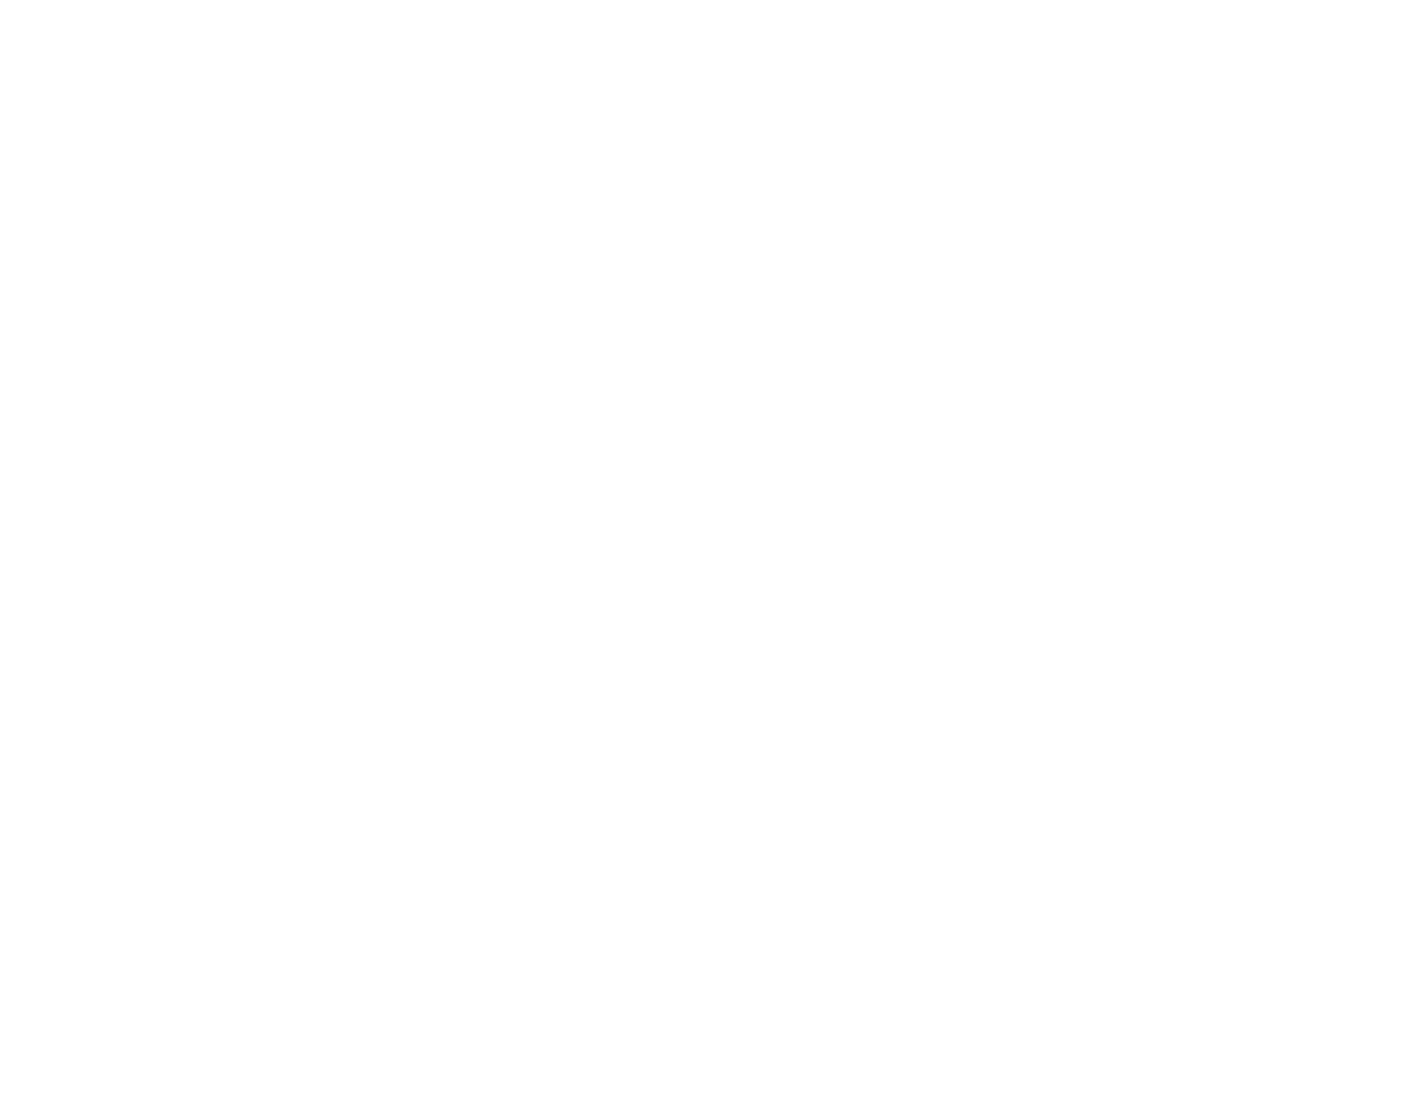

In [ ]:

#não conseguir desenhar o grafico 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arvore, 
                   feature_names=X.columns,  
                   class_names=y,
                   filled=True)


# Redes Neurais

In [ ]:
#usando o clasificador mlp usando 4 funções de ativação diferentes
#podendo ter tmb a quantidade de camadas e a quantidade de neuronios em cada camada
#defaut é  1 camada escondida com 100 neuronios
#a advertencia e que ele nao conseguiu convergir na quantidade 200 (defaut) de interações com pessos 
#contando apenas ate essa quantidade de interações.
mlp = MLPClassifier(activation="tanh")
mlp.fit(X, y)
mlp.predict(np.array(X_teste).reshape(1,-1))

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.])

In [ ]:
mlp = MLPClassifier(activation="logistic")
mlp.fit(X, y)
mlp.predict(np.array(X_teste).reshape(1,-1))

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.])

In [ ]:
mlp = MLPClassifier(activation="relu")
mlp.fit(X, y)
mlp.predict(np.array(X_teste).reshape(1,-1))

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.])

In [ ]:
mlp = MLPClassifier(activation="identity", hidden_layer_sizes=(10,))
mlp.fit(X, y)
mlp.predict(np.array(X_teste).reshape(1,-1))

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1.])

# Avaliação 

In [ ]:
#obs tem dados vazios
Base2 = pd.read_csv('res/breast-cancer.csv')

#adicionando os tipos na descrição da base 
Base2.describe(include=['float64', 'int64','object', 'bool'])
#coloquei para garantir o replace dos valores vazios, pois eles não tem nenhum caracter apenas em branco mesmo
Base2 = Base2.replace("?", np.NaN)
#coloquei para garantir que os valores vazios tenham algum valor 
#Subistituindo valores categoricos 
for col in Base2.columns:
    if Base2[col].dtypes == 'object':
        Base2[col] = Base2[col].fillna(Base2[col].value_counts().index[0])
#mostrando o tipo novamente          
Base2.dtypes



class                object
idade                object
menopausa            object
tamanho tumor        object
inv-nodulo           object
nodulo-caps          object
maligno               int64
peito                object
mamario-quadrimes    object
irradiado            object
dtype: object

In [ ]:
#subistituir com Label encoder, dados categoricos em númericos CASO A BASE NÃO SEJA NÚMERICA)
atributos = ["class"]
enc = OrdinalEncoder()
enc.fit(Base2[atributos])
Base2[atributos] = enc.transform(Base2[atributos])
Base2.describe(include=['float64', 'int64','object', 'bool'])
Base2

,class,idade,menopausa,tamanho tumor,inv-nodulo,nodulo-caps,maligno,peito,mamario-quadrimes,irradiado
0,0.0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0.0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0.0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0.0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0.0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1.0,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1.0,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1.0,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1.0,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
#usando One Hot Enconder
Base2 = pd.get_dummies(Base2, columns=["idade","menopausa","tamanho tumor","inv-nodulo","nodulo-caps","maligno","peito","mamario-quadrimes","irradiado"])
Base2

,class,idade_20-29,idade_30-39,idade_40-49,idade_50-59,idade_60-69,idade_70-79,menopausa_ge40,menopausa_lt40,menopausa_premeno,...,maligno_3,peito_left,peito_right,mamario-quadrimes_central,mamario-quadrimes_left_low,mamario-quadrimes_left_up,mamario-quadrimes_right_low,mamario-quadrimes_right_up,irradiado_no,irradiado_yes
0,0.0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,1,0
1,0.0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,0.0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0.0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
282,1.0,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
283,1.0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
284,1.0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
y = Base2.iloc[:,0]
X = Base2.iloc[:,1:]
#Padronizando
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,1.537760,0.938924,-0.938924,-0.281505,1.255618,-0.716399,-0.302660,-0.361158,0.558504,-0.558504
1,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,-0.650297,-1.065049,1.065049,-0.281505,-0.796421,-0.716399,-0.302660,2.768875,0.558504,-0.558504
2,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,-0.650297,0.938924,-0.938924,-0.281505,1.255618,-0.716399,-0.302660,-0.361158,0.558504,-0.558504
3,-0.059235,-0.379473,-0.677631,-0.710819,2.004381,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,-0.650297,-1.065049,1.065049,-0.281505,-0.796421,1.395870,-0.302660,-0.361158,0.558504,-0.558504
4,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,5.894913,...,-0.650297,-1.065049,1.065049,-0.281505,-0.796421,-0.716399,3.304038,-0.361158,0.558504,-0.558504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,-0.650297,0.938924,-0.938924,-0.281505,-0.796421,1.395870,-0.302660,-0.361158,0.558504,-0.558504
282,-0.059235,2.635231,-0.677631,-0.710819,-0.498907,-0.146385,-0.906452,-0.158397,0.95219,-0.169638,...,1.537760,0.938924,-0.938924,-0.281505,-0.796421,1.395870,-0.302660,-0.361158,-1.790498,1.790498
283,-0.059235,-0.379473,-0.677631,-0.710819,2.004381,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,-0.650297,-1.065049,1.065049,-0.281505,-0.796421,1.395870,-0.302660,-0.361158,0.558504,-0.558504
284,-0.059235,-0.379473,1.475730,-0.710819,-0.498907,-0.146385,1.103202,-0.158397,-1.05021,-0.169638,...,1.537760,0.938924,-0.938924,-0.281505,1.255618,-0.716399,-0.302660,-0.361158,0.558504,-0.558504


# Holdout

In [ ]:
# Holdout
# ira dividir em 4 bases para treino e teste  
#usando o valor de 0.3 que e 30% dos dados que serao usados para teste e o 42 e os dados aleatorios
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
X_treino #posui cada um dos atributos ja o y_treino possui a classe em ordem dos dados



,idade,menopausa,tamanho tumor,inv-nodulo,nodulo-caps,maligno,peito,mamario-quadrimes,irradiado
125,5.0,0.0,1.0,0.0,0.0,2,0.0,0.0,0.0
101,3.0,0.0,5.0,0.0,0.0,3,1.0,1.0,0.0
184,3.0,0.0,5.0,6.0,0.0,3,0.0,1.0,1.0
55,5.0,0.0,7.0,0.0,0.0,1,1.0,4.0,0.0
114,2.0,2.0,6.0,0.0,0.0,2,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
188,2.0,2.0,1.0,0.0,0.0,2,1.0,2.0,0.0
71,2.0,2.0,4.0,0.0,0.0,2,1.0,2.0,0.0
106,2.0,2.0,3.0,0.0,0.0,2,0.0,2.0,0.0
270,3.0,0.0,5.0,5.0,1.0,3,0.0,3.0,0.0


In [ ]:
#achando qual classe foi predita para cada elemento do meu teste
mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10,))
mlp.fit(X_treino, y_treino)
mlp.predict(X_teste)

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

# KFold

In [ ]:
#definir com kford dividindo o conjunto em 10 partes dividinod o x e o y apartir do indices
#separando o teste e de treino
# no for ele vai separar 10 vezes um conjunto de teste e de treino diferente onde a mlp coloca como 
#resultados ou seja das 10 interações
#em resumo ele divide a base em tamanhos iguais e executa para cada interação um proceso de 
#treino e um de teste ou seja o array e o resultado para cada interação

resultados = []
kf = KFold(n_splits=10, shuffle=True)
for index_treino, index_teste in kf.split(X):
    #X_treino, X_teste = X[index_treino], X[index_teste]
    #y_treino, y_teste = y[index_treino], y[index_teste]
    X_treino, X_teste = X.iloc[index_treino], X.iloc[index_teste]
    y_treino, y_teste = y.iloc[index_treino], y.iloc[index_teste]
    mlp.fit(X_treino, y_treino)
    resultados.append(mlp.predict(X_teste))
resultados

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\p

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.

# metricas

In [ ]:
#Acuracia
#score e o valor da curacia sempre pegando dados alearotios para calcular

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10,))
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7325581395348837

In [ ]:
#Precisão
#precisamos usar o valor predito pelo classificador que diz qual classe são os dados de teste
#colocando o valor na variavel Y_pred para precisão recall e f1score

y_pred = mlp.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')


0.671474358974359

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.5671688637790333

In [ ]:
#f1_score
f1_score(y_teste, y_pred, average='macro')

0.5516162669447341

# pratica do projeto

In [ ]:
#primeiramenta vamos dividir a base usando o Holdout em 70% treinamento e 30% teste 
# vamos usar os 70% para a avaliação
#usaremos o valor de k de 1 até 15 ou seja o k vai ter um valor diferente de vizinho por vez que repetir
#por fim o k-fold pega apenas os dados de treino para fazer a validação no caso o x_treino
#retornado pelo holdout ous seja os 70% dividido em 10 parcelas
#treinando o knn com o conjunto atual feito
#testar os resultados passando a curacia para fazer a validação q e o subconjunto dos dados de treinamentoque
#que usamos para validar o k
#por fim temos o valor medio de Acurácia para cada valor do knn


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

valores_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
resultados_knn = []

for k in valores_k:
    resultados_k = []
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        knn.fit(X_train, y_train)
        resultados_k.append(knn.score(X_validacao, y_validacao))
    resultados_knn.append(sum(resultados_k)/len(resultados_k))
resultados_knn

[0.64,
 0.7,
 0.675,
 0.72,
 0.72,
 0.72,
 0.725,
 0.72,
 0.73,
 0.7350000000000001,
 0.745,
 0.72,
 0.7100000000000001,
 0.7150000000000001,
 0.7300000000000001]

In [ ]:
#usando o melhor valor obtido do parametro irei usar ele para fazer o treinamento real 
#valor da acuracia

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_treino, y_treino)
knn.score(X_teste, y_teste)


0.7093023255813954

In [ ]:
#precisão
y_pred = knn.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')


0.7286585365853658

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')


0.5470809792843692

In [ ]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.5081217112788835

In [ ]:
#para o Svc usaremos 4 valores de kernel para saber qual e o melhor apartir da sua media

valores_kernel = ["linear", "poly", "rbf", "sigmoid"]
resultados_svm = []

for kernel in valores_kernel:
    resultados_kernel = []
    svc = SVC(kernel=kernel)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        svc.fit(X_train, y_train)
        resultados_kernel.append(svc.score(X_validacao, y_validacao))
    resultados_svm.append(sum(resultados_kernel)/len(resultados_kernel))
resultados_svm



[0.665, 0.7299999999999999, 0.6950000000000001, 0.6849999999999999]

In [ ]:
#de acordo valor de kernel obtido vamos usar ele para construir o classificador

svc = SVC(kernel="poly")
svc.fit(X_treino, y_treino)
svc.score(X_teste, y_teste)


0.6744186046511628

In [ ]:
#precisão
y_pred = svc.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')


0.545679012345679

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.5116133082234777

In [ ]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.4624999999999999

In [ ]:
#para a mlp rede neural testaremos 4 codigos de ativação para saber qual e o melhor apartir da sua media

valores_ativacao = ["identity", "logistic", "tanh", "relu"]
resultados_mlp = []

for ativacao in valores_ativacao:
    resultados_ativacao = []
    mlp = MLPClassifier(activation=ativacao)
    kf = KFold(n_splits=10, shuffle=True)
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino.iloc[index_train], X_treino.iloc[index_valid]
        y_train, y_validacao = y_treino.iloc[index_train], y_treino.iloc[index_valid]
        mlp.fit(X_train, y_train)
        resultados_ativacao.append(svc.score(X_validacao, y_validacao))
    resultados_mlp.append(sum(resultados_ativacao)/len(resultados_ativacao))
resultados_mlp

c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\pycharmprojects\rp\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\samue\p

[0.865, 0.865, 0.865, 0.865]

In [ ]:
#como os valores foram iguais/empataram escolhir um deles.para obter a curacia de..
mlp = MLPClassifier(activation="identity")
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)


0.6627906976744186

In [ ]:
#precisão
y_pred = mlp.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.582516339869281

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.5634023854362837

In [ ]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.563604549431321

In [ ]:
#navebays
gnb = GaussianNB()
gnb.fit(X_treino, y_treino)
gnb.score(X_teste, y_teste)

0.47674418604651164

In [ ]:
#precisão
y_pred = gnb.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.5887784090909092

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.5784682988072819

In [ ]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.47496947496947495

In [ ]:
arvore = DecisionTreeClassifier(criterion="entropy")
arvore.fit(X_treino, y_treino)
arvore.score(X_teste, y_teste)

0.5581395348837209

In [ ]:
#precisão
y_pred = arvore.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.4760655737704918

In [ ]:
#recall
recall_score(y_teste, y_pred, average='macro')

0.4770872567482737

In [ ]:
#f1-score
f1_score(y_teste, y_pred, average='macro')

0.47628205128205126